<a href="https://colab.research.google.com/github/YusraShereen/LGMVIP-DataScience/blob/main/EDA_Terrorism_DS_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK # 1**

# Exploratory Data Analysis on Terrorism Dataset

# Author: Yusra Shereen

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Reading Data**

In [3]:
url = '/content/drive/MyDrive/Data Science Internship/globalterrorismdb.csv'
data = pd.read_csv(url,encoding='latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### **FEATURE EXTRACTION**

In [4]:
data.rename(columns={'iyear':'year','imonth':'month','iday':"day",'gname':'group','country_txt':'Country','region_txt':'Region','provstate':'state','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'attacktype','targtype1_txt':'targettype','weaptype1_txt':'weapon','nkill':'kill',
     'nwound':'wound'},inplace=True)

data.head()

,eventid,year,month,day,approxdate,extended,resolution,country,Country,region,Region,state,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targettype,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,kill,nkillus,nkillter,wound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data = data[['year','month','day','Country','state','Region','city','latitude','longitude',"attacktype",'kill','wound','target1','summary','group','targettype','weapon','motive']]

data.head()

,year,month,day,Country,state,Region,city,latitude,longitude,attacktype,kill,wound,target1,summary,group,targettype,weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [6]:
data.info

<bound method DataFrame.info of         year  month  day  ...                   targettype      weapon motive
0       1970      7    2  ...  Private Citizens & Property     Unknown    NaN
1       1970      0    0  ...      Government (Diplomatic)     Unknown    NaN
2       1970      1    0  ...          Journalists & Media     Unknown    NaN
3       1970      1    0  ...      Government (Diplomatic)  Explosives    NaN
4       1970      1    0  ...      Government (Diplomatic)  Incendiary    NaN
...      ...    ...  ...  ...                          ...         ...    ...
181686  2017     12   31  ...                     Military    Firearms    NaN
181687  2017     12   31  ...                     Military  Explosives    NaN
181688  2017     12   31  ...  Private Citizens & Property  Incendiary    NaN
181689  2017     12   31  ...         Government (General)  Explosives    NaN
181690  2017     12   31  ...                      Unknown  Explosives    NaN

[181691 rows x 18 columns]>

In [7]:
data.shape

(181691, 18)

In [8]:
data.isna().sum()

year               0
month              0
day                0
Country            0
state            421
Region             0
city             434
latitude        4556
longitude       4557
attacktype         0
kill           10313
wound          16311
target1          636
summary        66129
group              0
targettype         0
weapon             0
motive        131130
dtype: int64

In [9]:
data.columns

Index(['year', 'month', 'day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'attacktype', 'kill', 'wound', 'target1',
       'summary', 'group', 'targettype', 'weapon', 'motive'],
      dtype='object')

In [10]:
import warnings
warnings.filterwarnings("ignore")

data.loc[:,'kill']= data["kill"].fillna(0)
data.loc[:,'wound']= data['wound'].fillna(0)

data['total_casualities']=data.loc[:,'kill'] + data.loc[:,'wound']

data.head()

,year,month,day,Country,state,Region,city,latitude,longitude,attacktype,kill,wound,target1,summary,group,targettype,weapon,motive,total_casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [11]:

data.describe()

,year,month,day,latitude,longitude,kill,wound,total_casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [12]:
casualities_per_year = data.groupby('year')['total_casualities'].sum()
casualities_per_year.head(10)

year
1970     386.0
1971     255.0
1972     975.0
1973     865.0
1974    1404.0
1975    1234.0
1976    1430.0
1977     974.0
1978    3059.0
1979    4606.0
Name: total_casualities, dtype: float64

**CASUALITIES IN EACH YEAR**

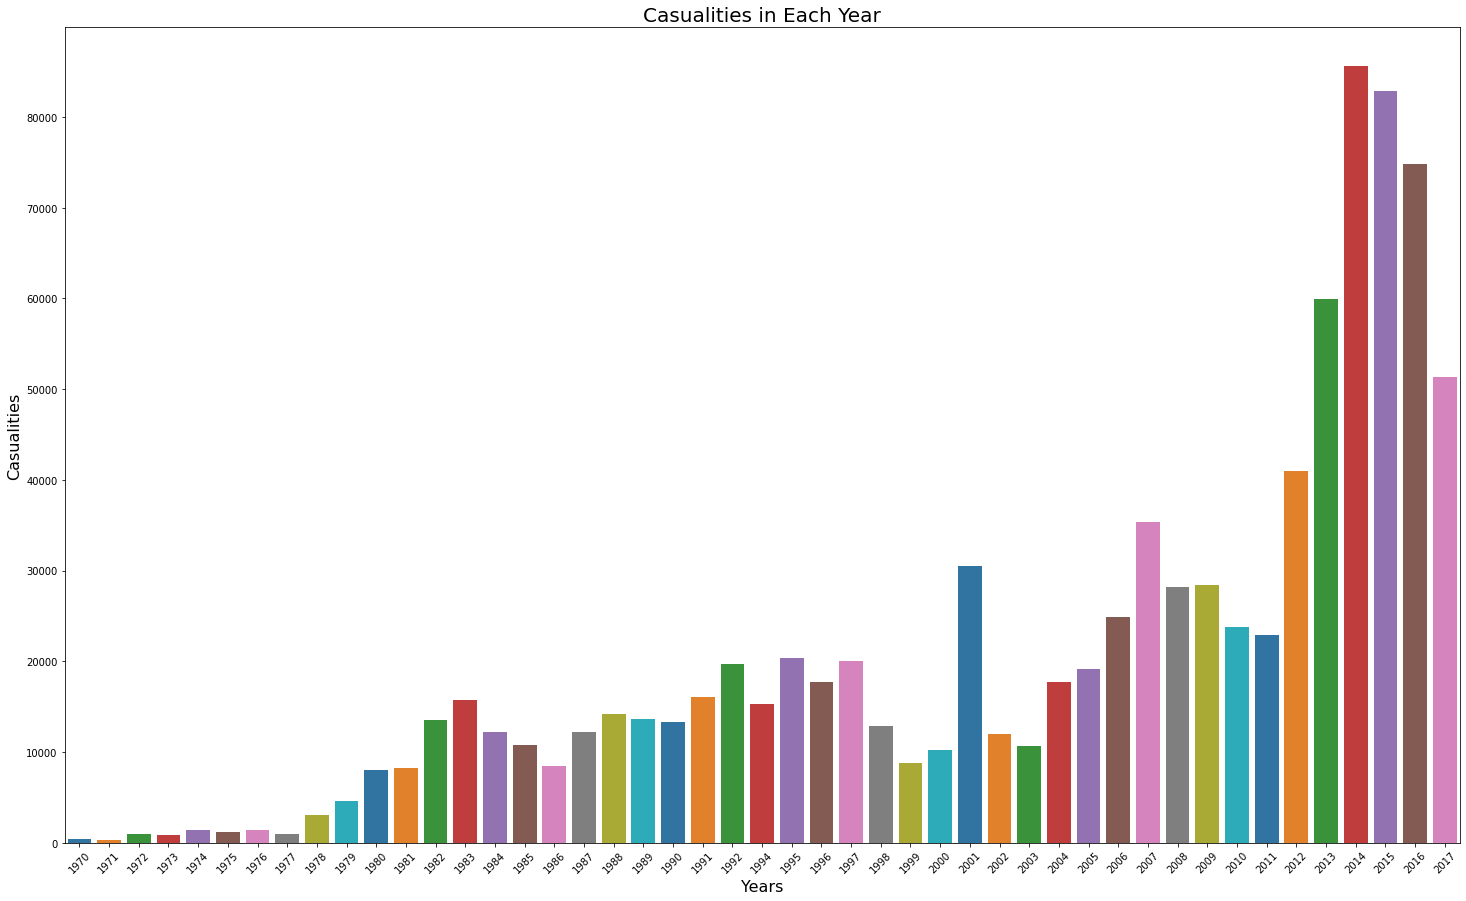

In [13]:
plt.figure(figsize = (25,15))

sns.barplot(x = data['year'].unique(), y = casualities_per_year , palette = "tab10")
plt.xticks(rotation = 45)
plt.xlabel('Years',fontsize=16)
plt.ylabel('Casualities',fontsize=16)
plt.title('Casualities in Each Year',fontsize=20)
plt.show()

Analysis shows that most casualities in terrorism incidents were placed in 2014

### **ATTACKS IN EACH YEAR**

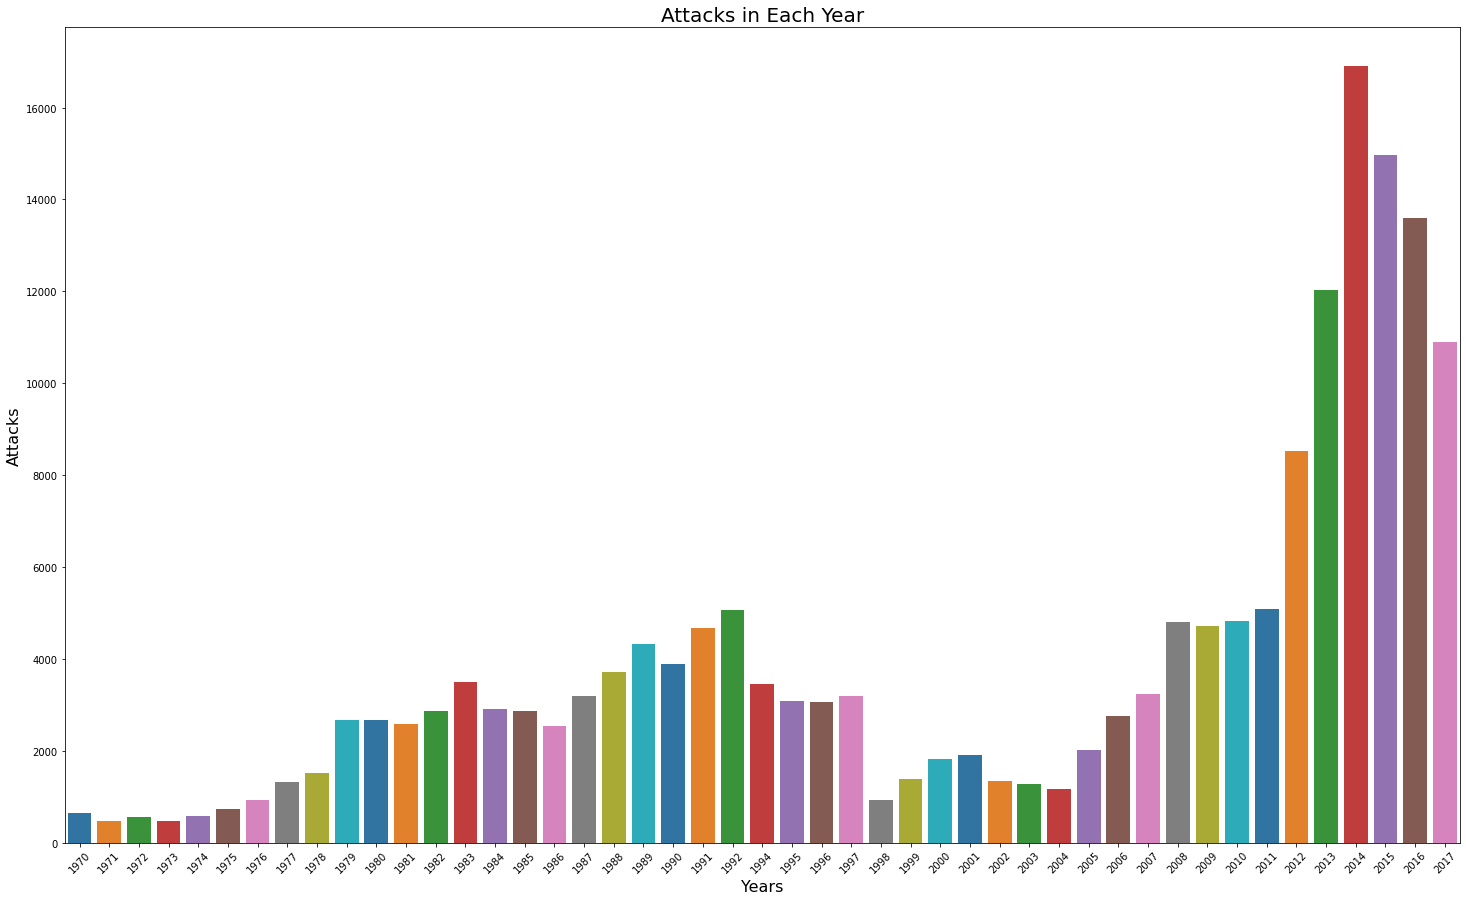

In [14]:
plt.figure(figsize = (25,15))
yrs = data['year'].unique()
sns.barplot(x = yrs , y = data['year'].value_counts().sort_index() , palette = "tab10")
plt.xticks(rotation = 45)
plt.xlabel('Years',fontsize=16)
plt.ylabel('Attacks',fontsize=16)
plt.title('Attacks in Each Year',fontsize=20)
plt.show()

In [15]:
affected_countries = data['Country'].value_counts()[:10]
affected_countries.head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

### MOST AFFECTED COUNTRIES BY TERRORISM

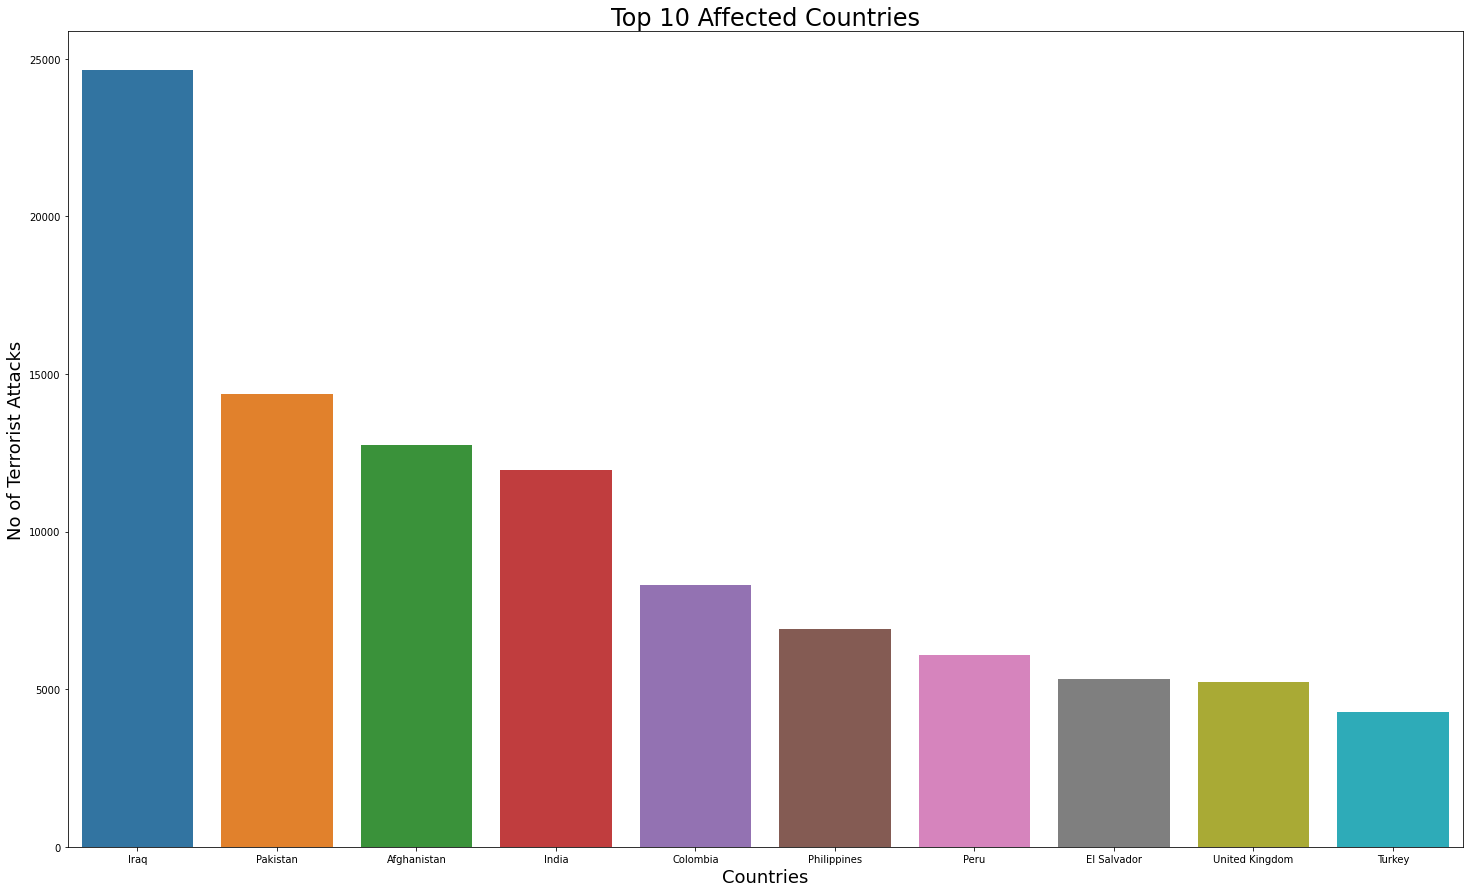

In [16]:
plt.figure(figsize = (25,15))
sns.barplot(x = affected_countries.index ,y =  affected_countries.values , palette = "tab10")
plt.xlabel('Countries',fontsize=18)
plt.ylabel('No of Terrorist Attacks',fontsize=18)
plt.title('Top 10 Affected Countries',fontsize=24)
plt.show()

In [17]:
affected_regions = data['Region'].value_counts()
affected_regions

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

### MOST AFFECTED REGIONS

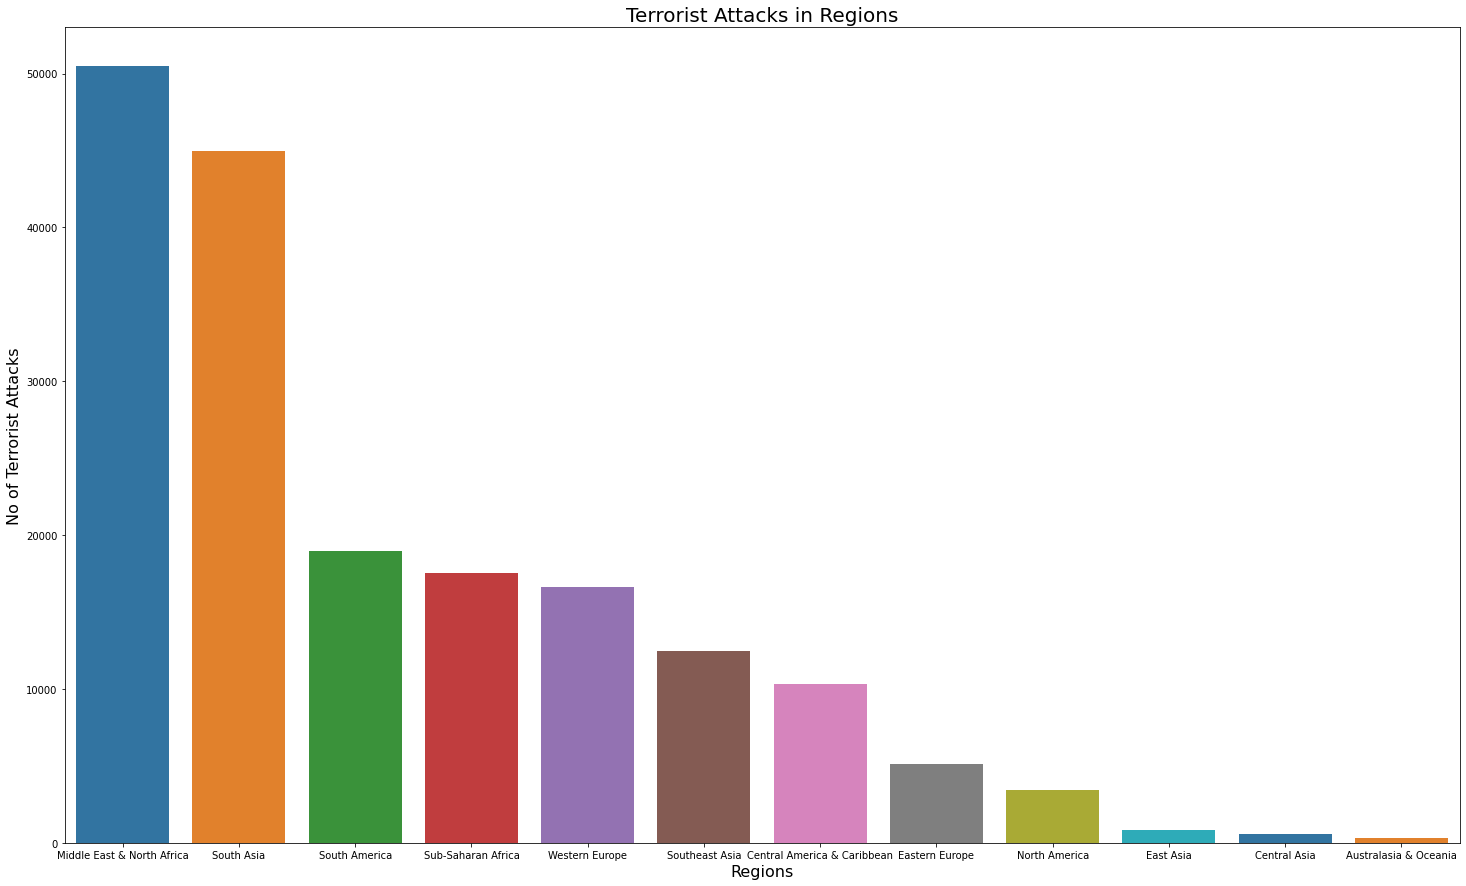

In [18]:
plt.figure(figsize = (25,15))
sns.barplot(x = affected_regions.index ,y =  affected_regions.values , palette = "tab10")
plt.xlabel('Regions',fontsize=16)
plt.ylabel('No of Terrorist Attacks',fontsize=16)
plt.title('Terrorist Attacks in Regions',fontsize=20)
plt.show()

### **MOST AFFECTED STATES BY TERRORISM**

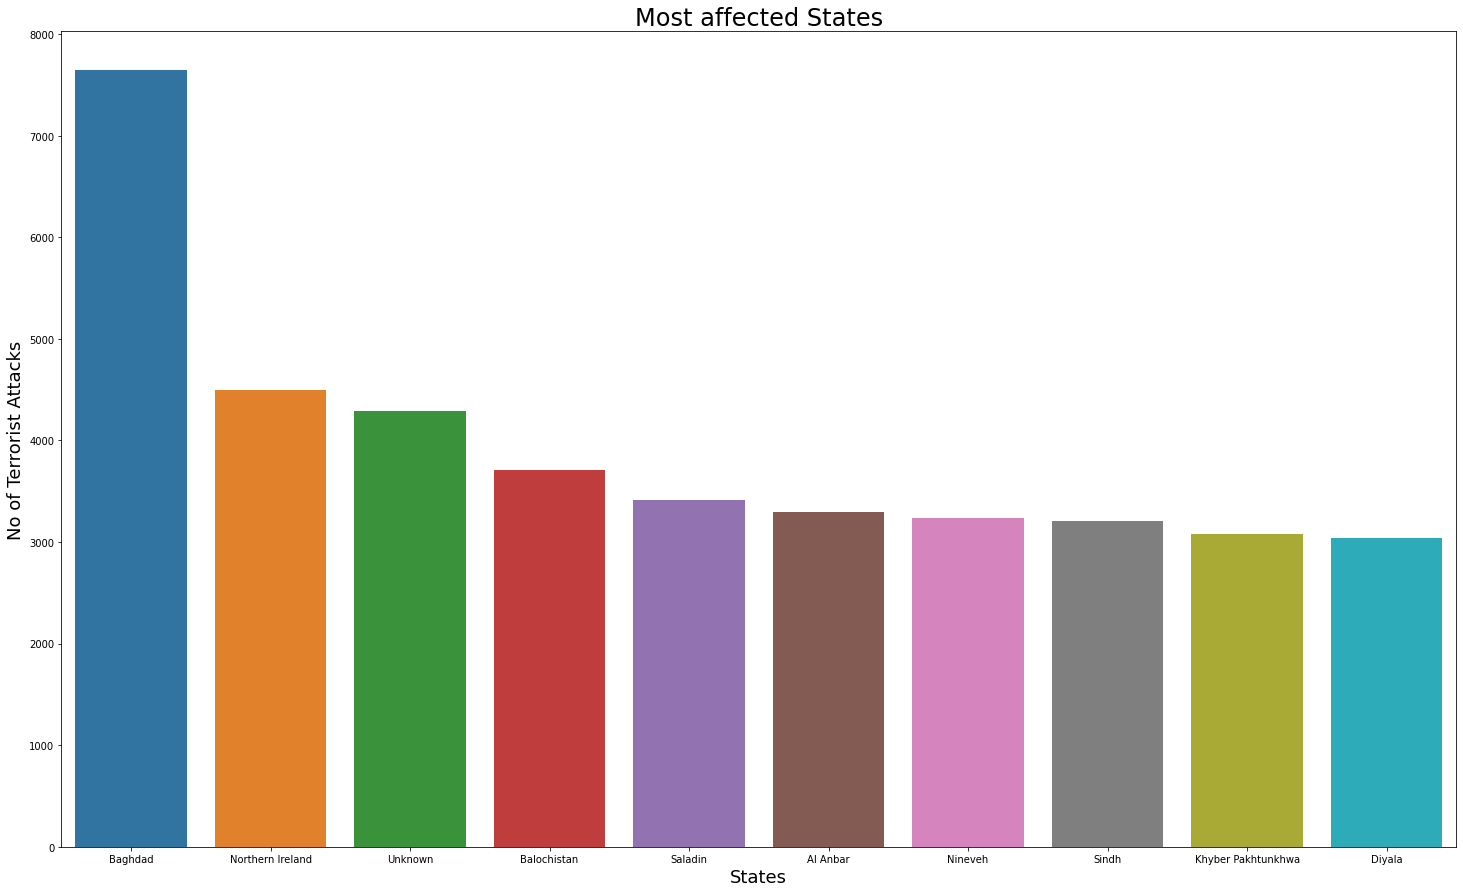

In [19]:
affected_states = data['state'].value_counts()[:10]
affected_states.head()

plt.figure(figsize = (25,15))
sns.barplot(x = affected_states.index ,y =  affected_states.values , palette = "tab10")
plt.xlabel('States',fontsize=18)
plt.ylabel('No of Terrorist Attacks',fontsize=18)
plt.title('Most affected States',fontsize=24)
plt.show()

**MOST AFFECTED CITIES BY TERRORISM**

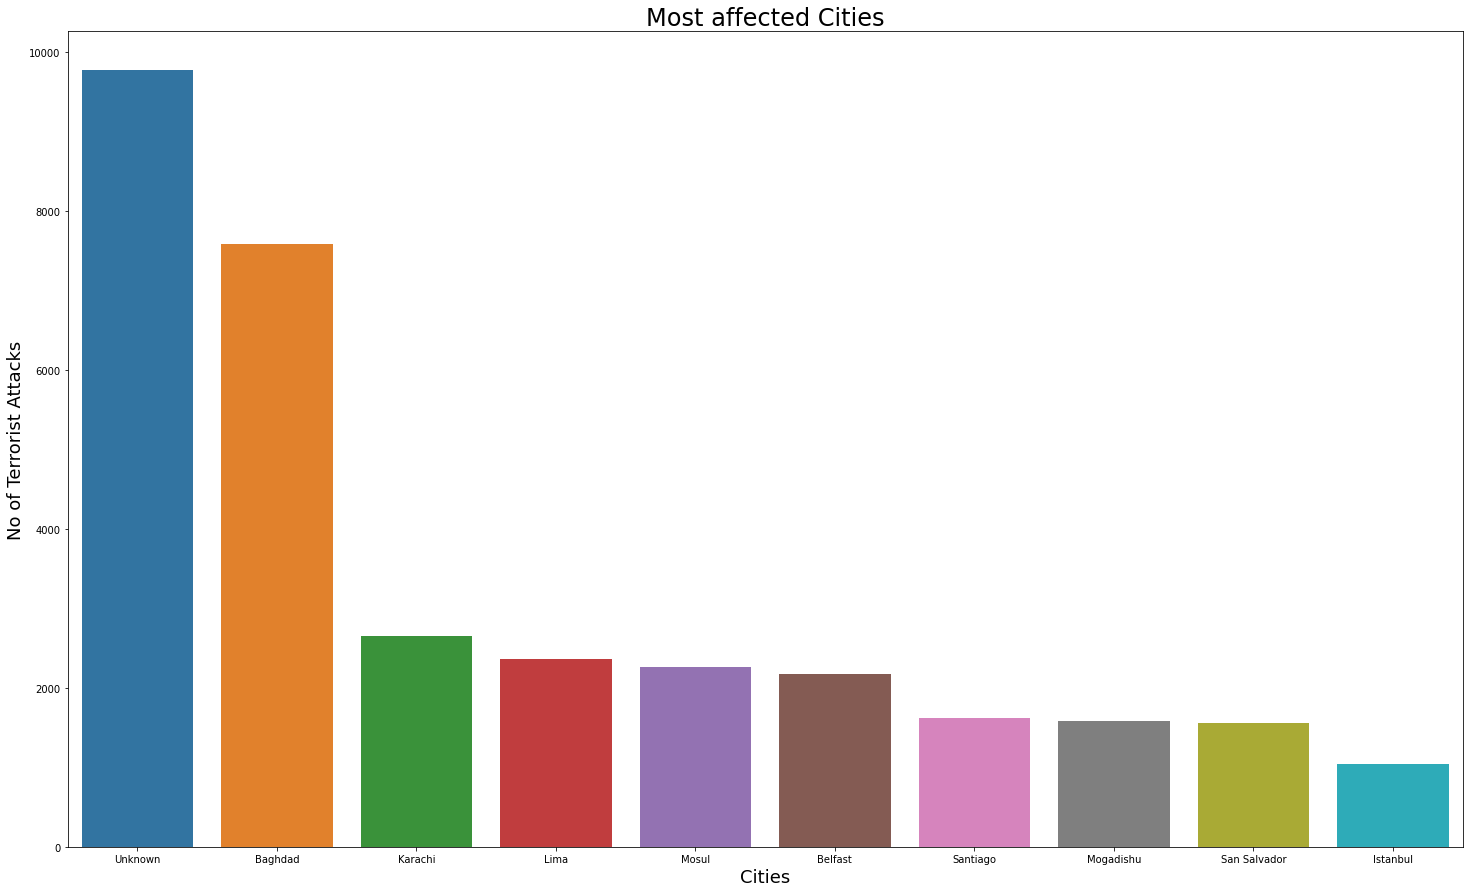

In [20]:
affected_cities = data['city'].value_counts()[:10]
affected_cities.head()

plt.figure(figsize = (25,15))
sns.barplot(x = affected_cities.index ,y =  affected_cities.values , palette = "tab10")
plt.xlabel('Cities',fontsize=18)
plt.ylabel('No of Terrorist Attacks',fontsize=18)
plt.title('Most affected Cities',fontsize=24)
plt.show()

### **MOST ATTACKING TERRORIST GROUPS**

In [21]:
ter_groups = data['group'].value_counts()
ter_groups.head()


Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: group, dtype: int64

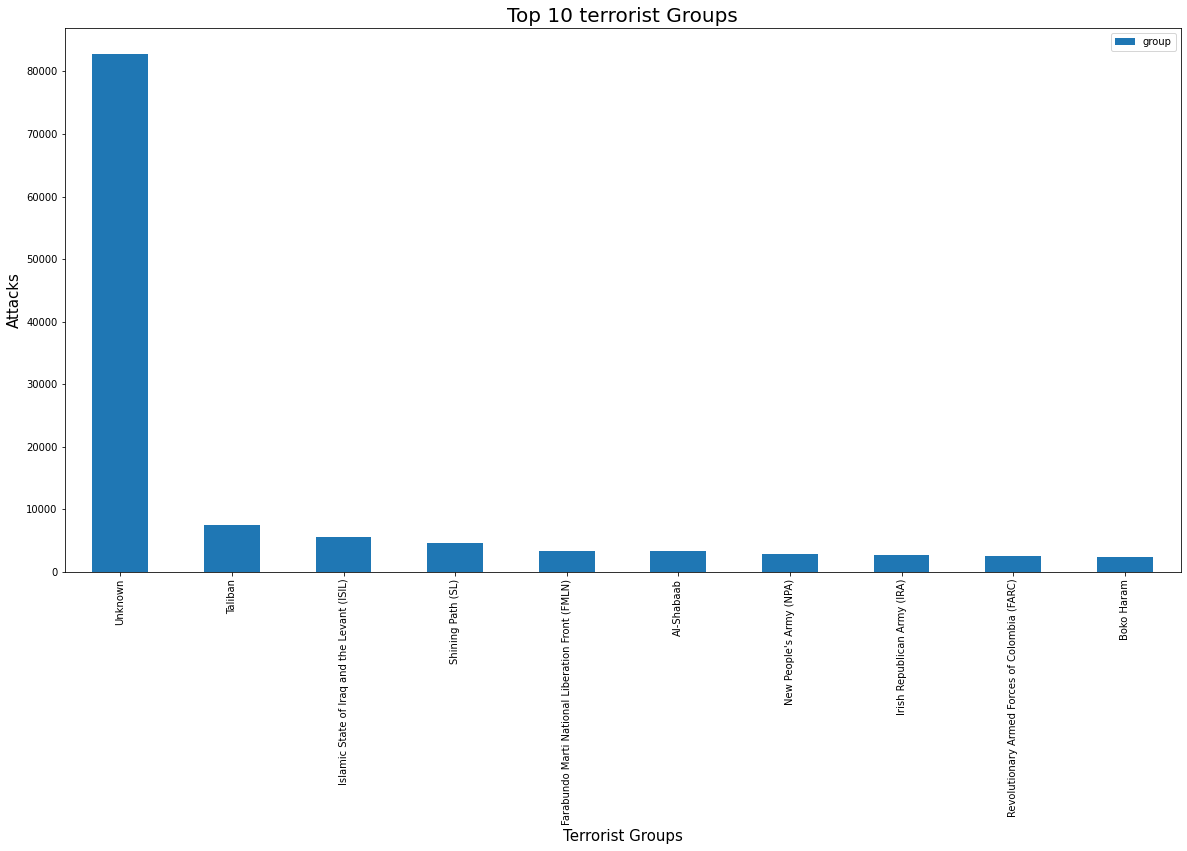

In [22]:
data['group'].value_counts().to_frame().head(10).plot(kind='bar',figsize=(20,10))
plt.title("Top 10 terrorist Groups",fontsize=20)
plt.xlabel("Terrorist Groups",fontsize=15)
plt.ylabel("Attacks",fontsize=15)
plt.show()

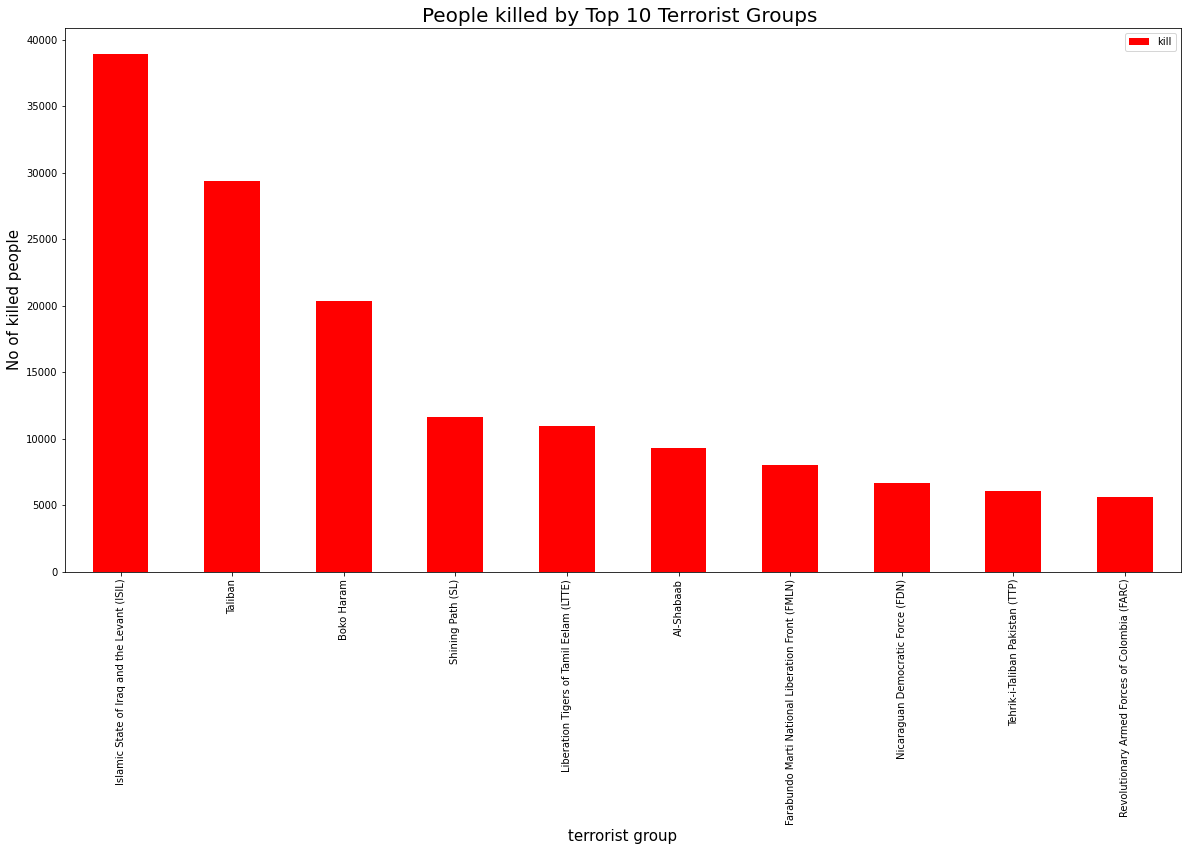

In [23]:
killed_by_grp =data[['group','kill']].groupby(['group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10)
killed_by_grp.plot(kind='bar',color='red',figsize=(20,10))
plt.title("People killed by Top 10 Terrorist Groups ",fontsize=20)
plt.xlabel("terrorist group",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

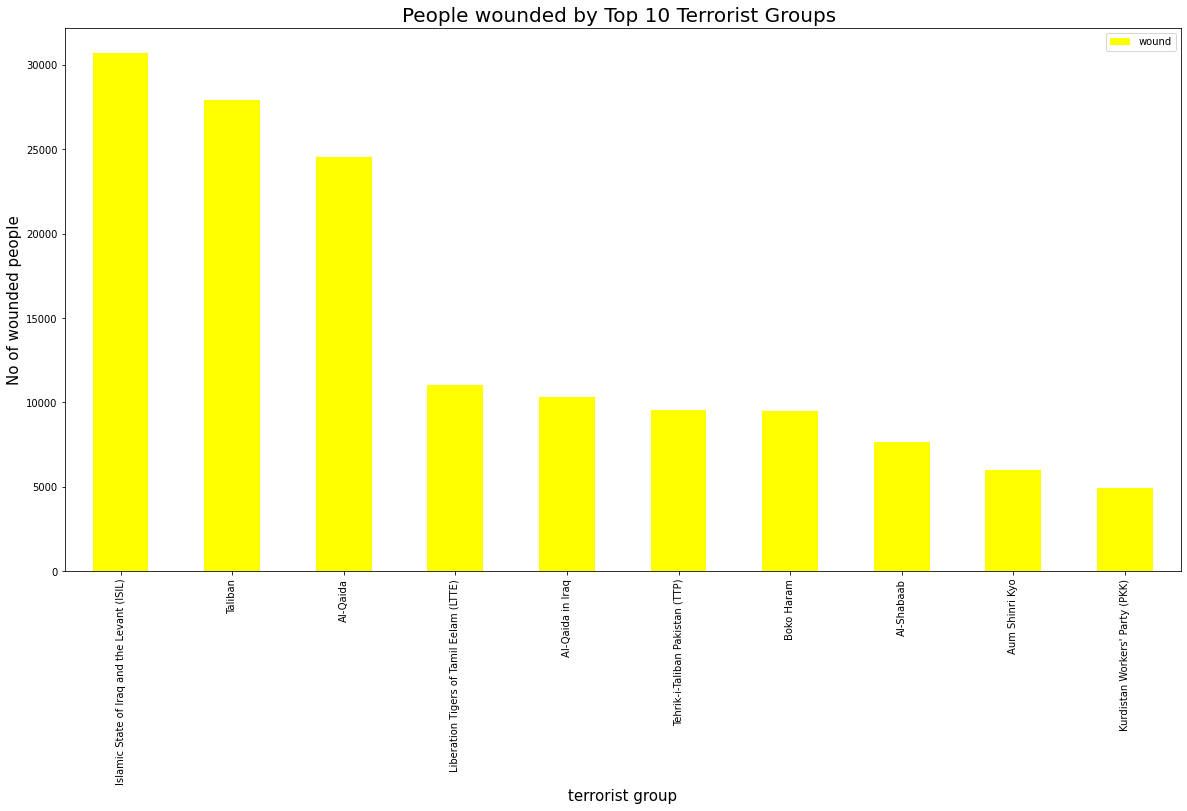

In [24]:
wounded_by_grp =data[['group','wound']].groupby(['group'],axis=0).sum().drop('Unknown').sort_values('wound',ascending=False).head(10)
wounded_by_grp.plot(kind='bar',color='yellow',figsize=(20,10))
plt.title("People wounded by Top 10 Terrorist Groups ",fontsize=20)
plt.xlabel("terrorist group",fontsize=15)
plt.ylabel("No of wounded people",fontsize=15)
plt.show()

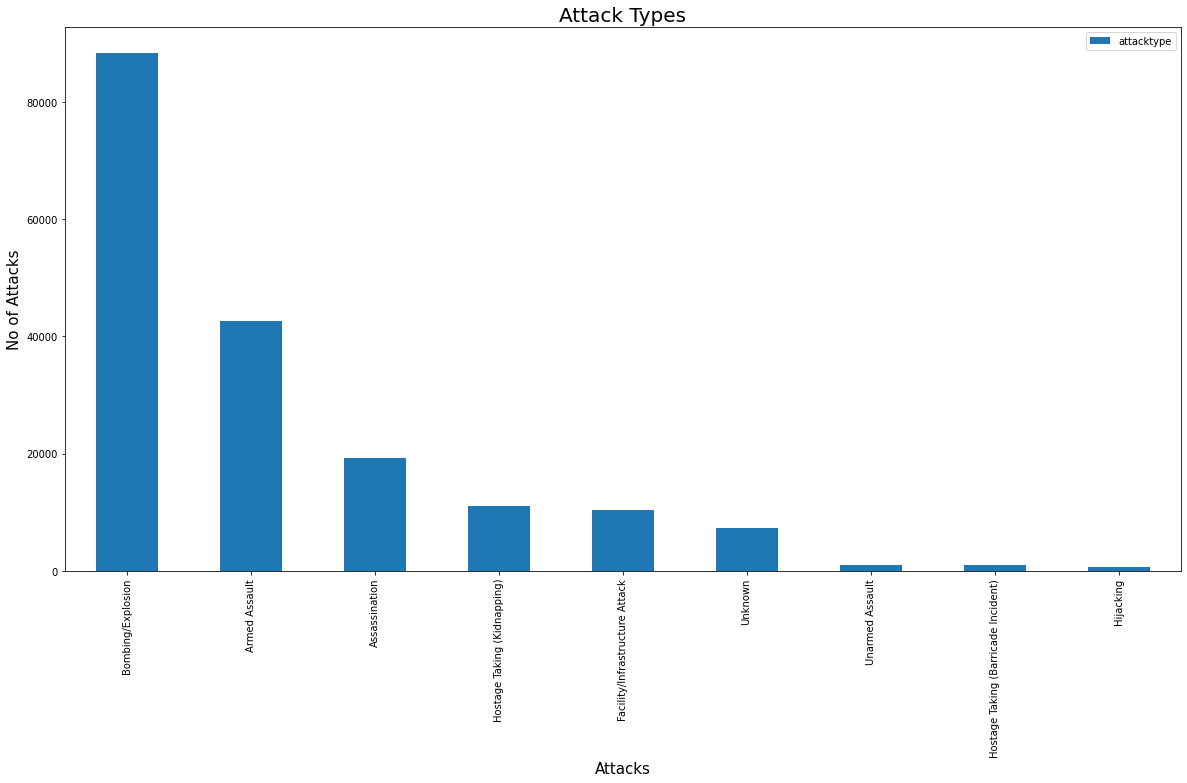

In [25]:
data['attacktype'].value_counts().to_frame().plot(kind='bar',figsize=(20,10))
plt.title("Attack Types",fontsize=20)
plt.xlabel("Attacks",fontsize=15)
plt.ylabel("No of Attacks",fontsize=15)
plt.show()

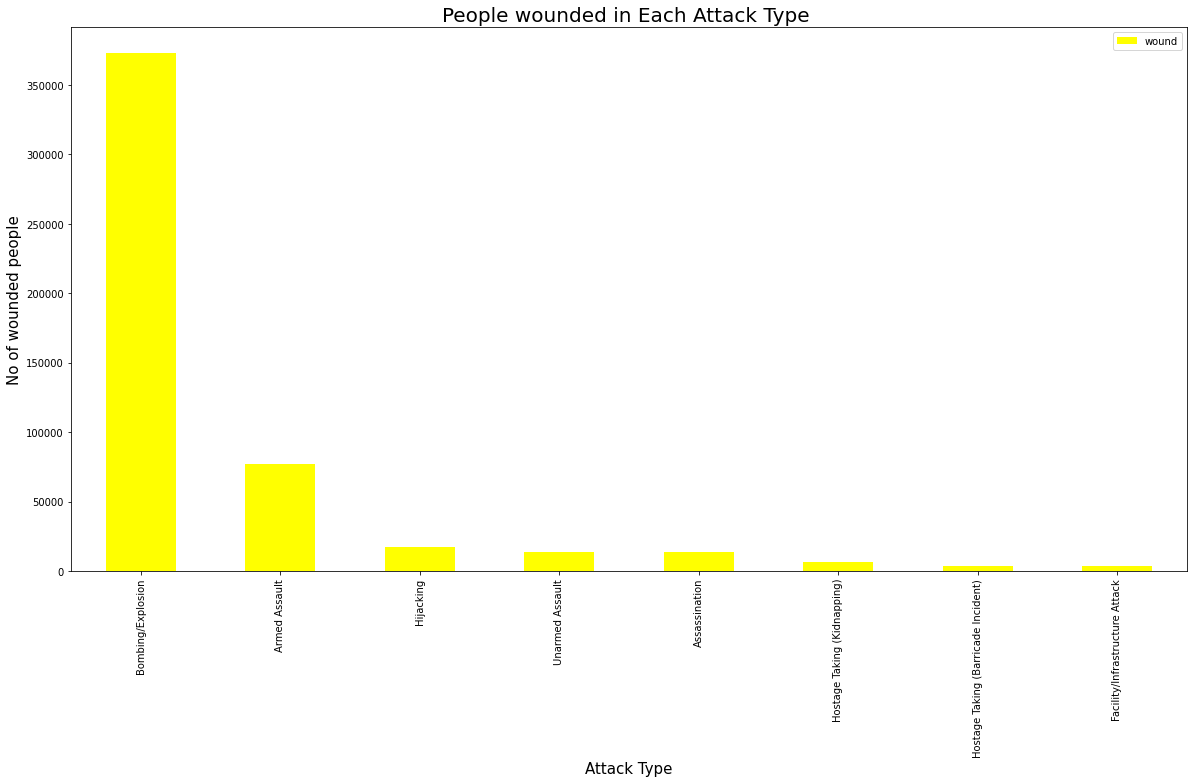

In [26]:
wounded_in_attacktype =data[['attacktype','wound']].groupby(['attacktype'],axis=0).sum().drop('Unknown').sort_values('wound',ascending=False)
wounded_in_attacktype.plot(kind='bar',color='yellow',figsize=(20,10))
plt.title("People wounded in Each Attack Type ",fontsize=20)
plt.xlabel("Attack Type",fontsize=15)
plt.ylabel("No of wounded people",fontsize=15)
plt.show()

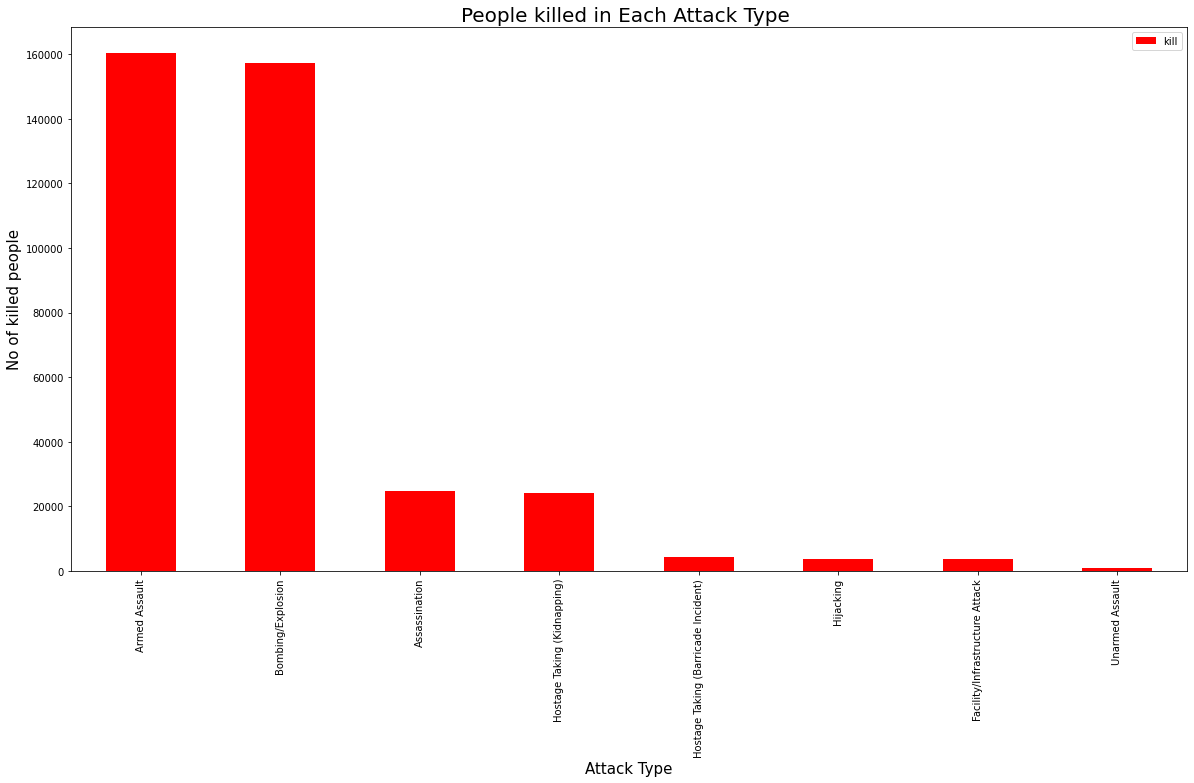

In [27]:
killed_in_attacktype =data[['attacktype','kill']].groupby(['attacktype'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False)
killed_in_attacktype.plot(kind='bar',color='red',figsize=(20,10))
plt.title("People killed in Each Attack Type ",fontsize=20)
plt.xlabel("Attack Type",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [28]:
df=data[['group','Country','kill']]
df=df.groupby(['group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index()
df[:20]

,group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [29]:
killed_country = data.pivot_table(values='kill', index='Country', aggfunc='sum').sort_values('kill',ascending = False)

killed_country.head()

,kill
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0


### **Exploring Data**

In [30]:
data.describe()

,year,month,day,latitude,longitude,kill,wound,total_casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000
